In [10]:
import pandas as pd
from pathlib import Path
import zipfile
import os
import sqlite3
from datetime import datetime
import glob
from pprint import pprint
import praw
import pprint
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import contractions
import re
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from collections import Counter
import gensim
from gensim import corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import gensim.downloader as api
from gensim.models.ldamodel import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
from dateutil.parser import parse
from datetime import datetime
from pandas import json_normalize

In [24]:
import pandas as pd
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import spacy
from nltk.stem import WordNetLemmatizer
import os
import http.client
import urllib.parse
import json
import pandas as pd
from datetime import datetime

In [28]:
os.getcwd() 

'C:\\Users\\PRAGYA\\coursework2'

In [26]:
def fetch_news():
    # Get today's date in YYYY-MM-DD format
    today = datetime.today().strftime('%Y-%m-%d')
    file_name = f'news_data_{today}.json'

    # Define the parent directory and file path
    # parent_dir = os.path.dirname(os.path.abspath(__file__))
    file_path = os.path.join(parent_dir, "data", file_name)

    # Check if the file for today's date exists
    if os.path.exists(file_path):
        # Load the JSON file
        with open(file_path, 'r', encoding='utf-8') as json_file:
            news_data = json.load(json_file)
        print(f"Loaded data from {file_name}")
    else:
        # Fetch news data from the API
        conn = http.client.HTTPConnection('api.mediastack.com')
        params = urllib.parse.urlencode({
            'access_key': '65c5e9342fc45dc08165bf28b32d8ccf',
            'categories': 'business',
            'sort': 'published_desc',
            "language": "en",
            "country": "gb"
        })
        conn.request('GET', '/v1/news?{}'.format(params))
        res = conn.getresponse()
        data = res.read()
        news_data = json.loads(data.decode('utf-8'))

        # Save the fetched data to a JSON file
        os.makedirs(os.path.join(parent_dir, "data"), exist_ok=True)
        with open(file_path, 'w', encoding='utf-8') as json_file:
            json.dump(news_data, json_file, ensure_ascii=False, indent=4)
        print(f"Fetched and saved data to {file_name}")

    # Convert the JSON data to a DataFrame
    news_df = pd.json_normalize(news_data['data'])
    
    # Optional: Convert 'published_at' to date if needed
    news_df['date'] = pd.to_datetime(news_df['published_at']).dt.date
    
    return news_df

In [27]:
# with open('C:\\Users\\PRAGYA\\MSC Project\\Streamlit\\stock-news-prediction\\data\\news_data.json', 'r', encoding='utf-8') as json_file:
#     news_data = json.load(json_file)
# new_df = pd.json_normalize(news_data['data'])
news_df = fetch_news()
news_df

Fetched and saved data to news_data_2024-09-01.json


,author,title,description,url,source,image,category,language,country,published_at,date
0,Paulo Barros,"“Contrate o seu dream team”, aconselha Magic J...",O astro do basquete americano encerrou o últim...,https://www.infomoney.com.br/business/contrate...,InfoMoney,None,business,pt,br,2024-08-31T22:36:14+00:00,2024-08-31
1,None,Harris: Trump 'Disrespected Sacred Ground' At ...,Democratic presidential candidate Kamala Harri...,https://www.ibtimes.com.au/harris-trump-disres...,International Business Times Au,None,business,en,au,2024-08-31T22:12:07+00:00,2024-08-31
2,Paulo Barros,Expert XP confirma Arnold Schwarzenegger para ...,"Ator, empresário, cineasta e ex-governador da ...",https://www.infomoney.com.br/advisor/expert-xp...,InfoMoney,None,business,pt,br,2024-08-31T22:08:58+00:00,2024-08-31
3,augustodiniz,Influenciadores creem que autenticidade impuls...,"Bruno Paolinelli, Arthurito Faria Lima e Faust...",https://www.infomoney.com.br/mercados/influenc...,InfoMoney,None,business,pt,br,2024-08-31T22:06:09+00:00,2024-08-31
4,Chris Roush,Telegraph taps Kelly as associate money editor,The Telegraph in London has hired Helena Kelly...,https://talkingbiznews.com/media-news/telegrap...,Talking Biz News,None,business,en,us,2024-08-31T21:41:37+00:00,2024-08-31
5,Monique Lima,Kamala tem propostas socialistas e Trump pode ...,Os gestores expressaram preocupação em relação...,https://www.infomoney.com.br/mundo/kamala-tem-...,InfoMoney,None,business,pt,br,2024-08-31T21:41:05+00:00,2024-08-31
6,Reuters,Harris calls Trump cemetery visit disrespectfu...,Harris calls Trump cemetery visit disrespectfu...,https://www.investing.com/news/world-news/harr...,Investing.com | Stock Market Quotes &amp; Fina...,https://i-invdn-com.investing.com/trkd-images/...,business,en,us,2024-08-31T21:30:37+00:00,2024-08-31
7,Fábio Matos,"Pente-fino garante déficit zero em 2025, mas “...","""Nós não vamos mudar o arcabouço e muito menos...",https://www.infomoney.com.br/politica/pente-fi...,InfoMoney,None,business,pt,br,2024-08-31T21:20:39+00:00,2024-08-31
8,Business Matters,UK government introduces AI training courses f...,The UK Government has launched nine AI trainin...,https://bmmagazine.co.uk/in-business/uk-govern...,Business Matters | The Uk's Leading Sme Busine...,None,business,en,gb,2024-08-31T21:08:34+00:00,2024-08-31
9,Paulo Barros,Mercado não está considerando erro de pesquisa...,"Para o gestor da Verde, há chances de que disp...",https://www.infomoney.com.br/onde-investir/mer...,InfoMoney,None,business,pt,br,2024-08-31T20:54:04+00:00,2024-08-31


In [6]:
news_df.rename(columns = {'title':'headline','description':'short_description','published_at':'date'},inplace=True)
news_df = news_df[['date','headline','category','short_description','source']]
news_df['date'] = pd.to_datetime(news_df['date'])
news_df

C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_25880\593789792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['date'] = pd.to_datetime(news_df['date'])


,date,headline,category,short_description,source
0,2024-08-31 17:23:25+00:00,Coinbase announces first AI-to-AI crypto trans...,business,Coinbase announces first AI-to-AI crypto trans...,Seeking Alpha
1,2024-08-31 17:23:23+00:00,Twitter/X: Lira revela preocupação com “insegu...,business,"Em entrevista coletiva, após participar de pai...",InfoMoney
2,2024-08-31 17:23:06+00:00,Chennai Formula 4 night street race: Glimpse f...,business,Chennai Formula 4 night street race: Glimpse f...,Business Line
3,2024-08-31 17:13:37+00:00,"BC interfere no câmbio quando há disfunções, d...",business,O BC anunciou nesta semana um leilão de até US...,InfoMoney
4,2024-08-31 17:01:46+00:00,Lira vê polarização na eleição de 2026 e desta...,business,"""O problema da polarização não é um problema d...",InfoMoney
5,2024-08-31 16:56:06+00:00,Aldi setzt auf neuen Standard: So sehen alle k...,business,Aldi setzt auf neuen Standard: So sehen alle k...,Google News Business DE
6,2024-08-31 16:52:55+00:00,Weekend Long Read: Can India Become the World’...,business,Weekend Long Read: Can India Become the World’...,Google News Business IN
7,2024-08-31 16:44:14+00:00,Tamil Nadu Chief Minister Inks Pact With Googl...,business,Tamil Nadu Chief Minister Inks Pact With Googl...,Bloomberg | Latest And Live Business
8,2024-08-31 16:43:15+00:00,PM Modi Bats For Speedy Justice In Cases Of Cr...,business,PM Modi Bats For Speedy Justice In Cases Of Cr...,Bloomberg | Latest And Live Business
9,2024-08-31 16:42:28+00:00,Committed To Make Rail Travel Comfortable For ...,business,Committed To Make Rail Travel Comfortable For ...,Bloomberg | Latest And Live Business


In [2]:
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

In [8]:
add_words = {'news','read','story','world','newsbrief','huffpost','short',
            'wrapup'}
stop_words = stop_words.union(add_words)
phrases_to_remove = [
    'new york city', 
    'new york times', 
    'rise morning',
    'huffpost rise morning newsbrief', 
    'morning newsbrief short wrapup',
    'welcome to the huffPost rise Morning Newsbrief',
    'a short wrap-up of the news to help you start your day',
    'welcome huffpost rise morning newsbrief short wrapup help start day',
    'HuffPost Rise What You Need To Know On',
]

news_source_words = news_df['source'].unique()
phrases_to_remove.extend(news_source_words)
phrases_to_remove

['new york city',
 'new york times',
 'rise morning',
 'huffpost rise morning newsbrief',
 'morning newsbrief short wrapup',
 'welcome to the huffPost rise Morning Newsbrief',
 'a short wrap-up of the news to help you start your day',
 'welcome huffpost rise morning newsbrief short wrapup help start day',
 'HuffPost Rise What You Need To Know On',
 'Seeking Alpha',
 'InfoMoney',
 'Business Line',
 'Google News Business DE',
 'Google News Business IN',
 'Bloomberg | Latest And Live Business']

In [9]:
# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Contractions expansion
    try:
        text = contractions.fix(text)
    except:
        print(text)
    
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Remove numbers
    text = re.sub(r'\d+', '', text)
    # 5.0 Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('[\?|$|.|!-/,]',"", text)
    
    # 5.1. Remove specific phrases
    for phrase in phrases_to_remove:
        text = re.sub(re.escape(phrase.lower()), '', text)

    # 6. Tokenize text
    tokens = word_tokenize(text)

    # 7. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 8. Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 9. Remove special characters 
    tokens = [re.sub(r'\W+', '', word) for word in tokens]
    
    # Remove single alphabet characters
    tokens = [word for word in tokens if len(word) > 1 and word.isalpha()]

    # 10. Remove extra whitespace and join tokens back into a single string
    cleaned_text = ' '.join(tokens).strip()

    return cleaned_text

In [15]:
news_df['combined'] = news_df['headline'] + news_df['short_description']
news_df['combined'] = news_df['combined'].fillna('').astype(str)
news_df['date'] = news_df['date'].dt.date
combined_df = news_df.groupby('date').agg({
    'combined': ' '.join
}).reset_index()
combined_df

C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_25880\3630621884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['combined'] = news_df['headline'] + news_df['short_description']
C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_25880\3630621884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['combined'] = news_df['combined'].fillna('').astype(str)
C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_25880\3630621884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,date,combined
0,2024-08-31,Coinbase announces first AI-to-AI crypto trans...


In [18]:
combined_df['clean_title'] = combined_df['combined'].apply(clean_text)

In [19]:
comment_combined =''
for each in combined_df['clean_title']:
    comment_combined = comment_combined + " " + each

In [20]:
startofdoc = 0
endofdoc = 1000000

df_ner = pd.DataFrame(columns=['Text','Label'])

while startofdoc < len(comment_combined) :
    print(startofdoc, endofdoc)
    doc = nlp(comment_combined[startofdoc:endofdoc])

    for ent in doc.ents:
        df_ner.loc[len(df_ner)]  = [ent.text, ent.label_]
    startofdoc = startofdoc + 1000000 + 1
    endofdoc = endofdoc + 1000000 - 2

0 1000000


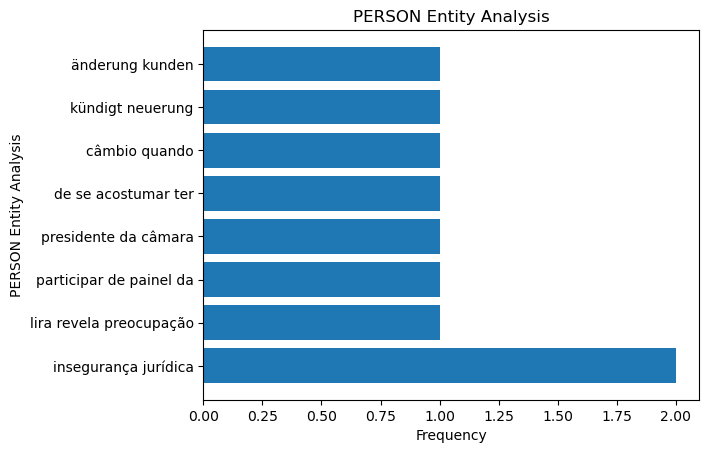

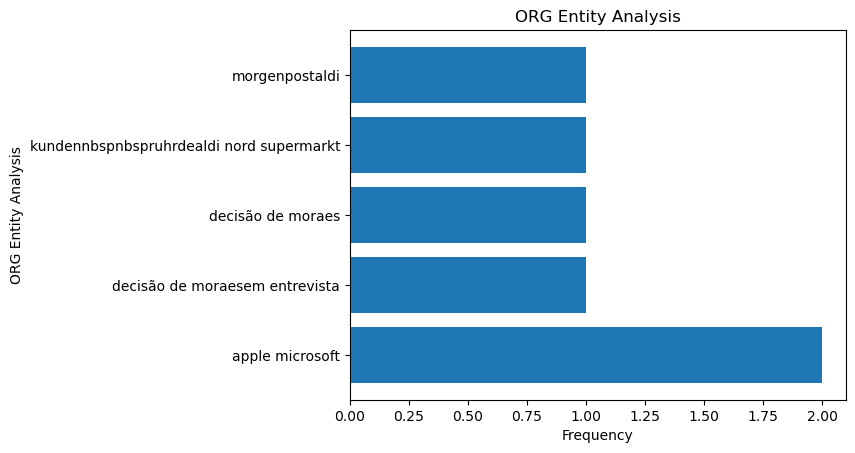

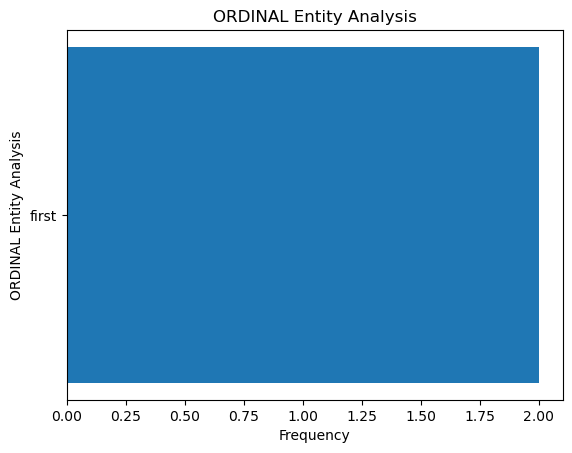

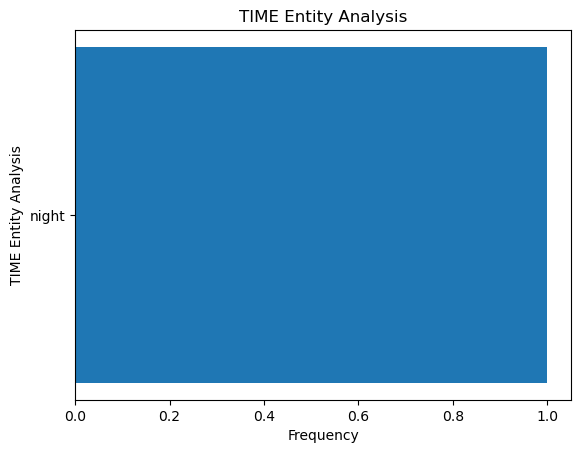

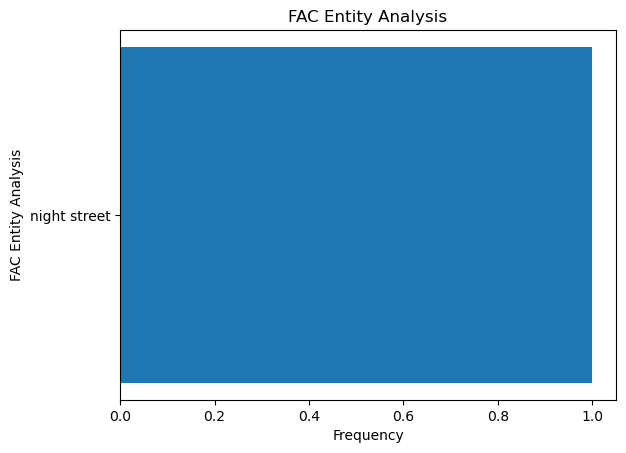

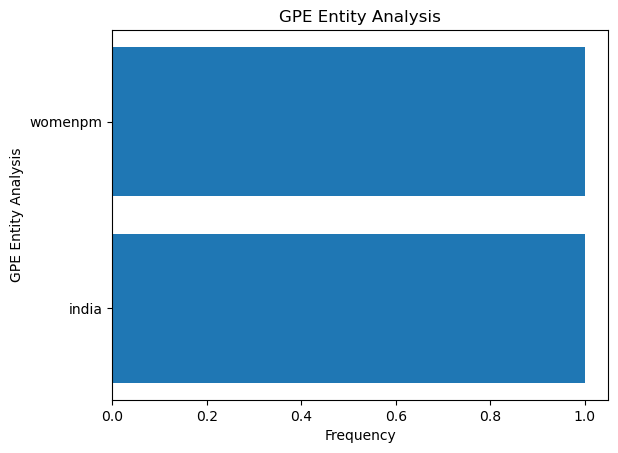

In [21]:
for name_val in df_ner['Label'].unique():
    xdf = pd.DataFrame(df_ner[df_ner['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
    xdf = xdf.rename(columns = {'index':name_val})
    xdf = xdf.rename(columns = {'Text':'frequency'})
    plt.barh(xdf[name_val], xdf.frequency)

    # setting label of y-axis
    plt.ylabel( name_val + " Entity Analysis")

    # setting label of x-axis
    plt.xlabel("Frequency")
    plt.title(name_val + " Entity Analysis")
    plt.show()

In [ ]:
fetch_news